In [ ]:
!pip install -q pythainlp
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from pythainlp import word_tokenize
from pythainlp import sent_tokenize
import os
from tqdm.notebook import tqdm
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["font.family"] = "serif"

In [ ]:
df_trtpbs = pd.read_csv('/content/drive/My Drive/Final_Datasets/tr-tpbs.csv')
df_tr = pd.read_csv('/content/drive/My Drive/Final_Datasets/additional-datasets/thairath-222.csv')
df_tpbs = pd.read_csv('/content/drive/My Drive/Final_Datasets/additional-datasets/thaiPBS-111k.csv')
df_th2en = pd.read_csv('/content/drive/My Drive/Final_Datasets/TH-CLS-Corpus/trainset_th2en.csv')

# The Size Comparision of Datasets

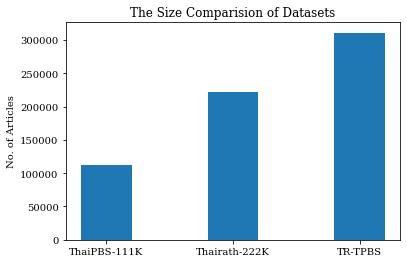

ThaiPBS-111k  contains  111614  news
Thairath-222k contains  222553  news
TR-TPBS       contains  310926  news


In [95]:
objects = ('ThaiPBS-111K','Thairath-222K', 'TR-TPBS')
y_pos = np.arange(len(objects))
datasets_size = [len(df_tpbs), len(df_tr), len(df_trtpbs)]
plt.bar(y_pos, datasets_size, align='center', alpha=1, width=0.4)
plt.xticks(y_pos, objects)
plt.ylabel('No. of Articles')
plt.title('The Size Comparision of Datasets')
plt.show()

print("ThaiPBS-111k  contains ", len(df_tpbs), " news")
print("Thairath-222k contains ", len(df_tr), " news")
print("TR-TPBS       contains ", len(df_trtpbs), " news")

#Elements (Columns) Contained in each Dataset

In [ ]:
print('TR-TPBS')
print('Number of Aritcles: ', len(df_trtpbs))
df_trtpbs.head(1)

TR-TPBS
Number of Aritcles:  310926


,body,labels,summary,tags,title,url
0,วันนี้ (23 ม.ค. 2559) นายธวัชชัย จิตรภาษ์นันท์...,เศรษฐกิจ,กสทช. เตรียมขอการสนับสนุนงบประมาณจากกองทุน กทป...,"ระบบจัดเรตติ้งโทรทัศน์ไทยใหม่,กสทช.,กองทุน กทป...",กสทช.เตรียมของบ กทปส. ปฏิรูปวิจัยเรตติ้งทีวีแบ...,https://news.thaipbs.or.th/content/7496


In [ ]:
print('Thairath-222K')
print('Number of Aritcles: ', len(df_tr))
df_tr.head(1) 

Thairath-222K
Number of Aritcles:  222553


,title,body,summary,type,tags,url,date,title_length,article_length,summary_length,abs_n1,abs_n2,abs_n3,abs_n4,abs_n5
0,"โป้งเดียวร่วง ""ฝนพันล้าน"" ต่อยแจ๊คแพ้น็อก 4 มว...",วันที่ 30 พ.ย. 62 ศึกมวยไทยเกียรติเพชร ซูเปอร...,ฝนพันล้าน พี.เค.แสนชัยมวยไทยยิม หมัดหนักเอาเรื...,"กีฬา,มวย/MMA","มวยลุมพินี,มวยไทย,ฝนพันล้าน พี.เค.แสนชัยมวยไทย...",https://www.thairath.co.th/sport/boxing-mma/17...,2019-12-01T00:30:00+07:00,16.0,248.0,43.0,20.0,33.333333,41.463415,50.0,58.974359


In [ ]:
print('ThaiPBS-111K')
print('Number of Aritcles: ', len(df_tpbs))
df_tpbs.head(1)

ThaiPBS-111K
Number of Aritcles:  111614


,title,body,summary,tags,label,url,article_length,summary_length,title_length,abstractedness_n1,abstractedness_n2,abstractedness_n3,abstractedness_n4,abstractedness_n5
0,นักวิจัยออสเตรเลียเผยสาเหตุฉลามโจมตีมนุษย์,นายนาธาน ฮาร์ท หัวหน้าทีมวิจัยจากมหาวิทยาลัยเว...,ทีมนักวิจัยออสเตรเลียศึกษาว่าเหตุใดฉลามถึงจู่...,"ฉลาม,นักวิจัย,มนุษย์,ออสเตรเลีย,แมวน้ำ,โจมตี",ต่างประเทศ,https://news.thaipbs.or.th/content/1,148.0,23.0,7.0,4.761905,50.0,66.666667,75.0,84.210526


In [ ]:
print('Thai Crosslingual Summarization: Thai to English (TH2EN)')
print('Number of Aritcles: ', len(df_th2en))
print("Column \'en2th\' is the back-translation of \'en_summary\'")
df_th2en.tail(1)

Thai Crosslingual Summarization: Thai to English (TH2EN)
Number of Aritcles:  219336
Column 'en2th' is the back-translation of 'en_summary'


,th_body,th_sum,en_body,en_summary,en2th,url
219335,โนวัค ยอโควิช นักเทนนิสมือ 1 ของโลก จากเซอร์เบ...,โนวัค ยอโควิช กลายเป็นนักเทนนิสคนที่ 16 ของปร...,"Novak Yeokowich, the world's No.1 tennis playe...",Novak Djokovic became the 16th tennis player i...,โนวัค ดโจโควิค กลายเป็นนักเทนนิสคนที่ 16 ในประ...,https://news.thaipbs.or.th/content/39635


# Number of Unique Tags and Labels

In [ ]:
#tags
unique_tags_trtpbs = set()
for index, row in tqdm(df_trtpbs.iterrows(), total=df_trtpbs.shape[0]):
  if pd.isnull(row['tags']):
    continue
  tags = row['tags'].split(',')
  unique_tags_trtpbs.update(tags)
  
unique_tags_tpbs = set()
for index, row in tqdm(df_tpbs.iterrows(), total=df_tpbs.shape[0]):
  if pd.isnull(row['tags']):
    continue
  tags = row['tags'].split(',')
  unique_tags_tpbs.update(tags)

unique_tags_df_tr = set()
for index, row in tqdm(df_tr.iterrows(), total=df_tr.shape[0]):
  if pd.isnull(row['tags']):
    continue
  tags = row['tags'].split(',')
  unique_tags_df_tr.update(tags)

#labels
unique_type_trtpbs = set()
for index, row in tqdm(df_trtpbs.iterrows(), total=df_trtpbs.shape[0]):
  if pd.isnull(row['labels']):
    continue
  type_ = row['labels'].split(',')
  unique_type_trtpbs.update(type_)

unique_type_df_tr = set()
for index, row in tqdm(df_tr.iterrows(), total=df_tr.shape[0]):
  if pd.isnull(row['type']):
    continue
  type_ = row['type'].split(',')
  unique_type_df_tr.update(type_)

unique_type_tpbs = set()
for index, row in tqdm(df_tpbs.iterrows(), total=df_tpbs.shape[0]):
  if pd.isnull(row['label']):
    continue
  type_ = row['label'].split(',')
  unique_type_tpbs.update(type_)

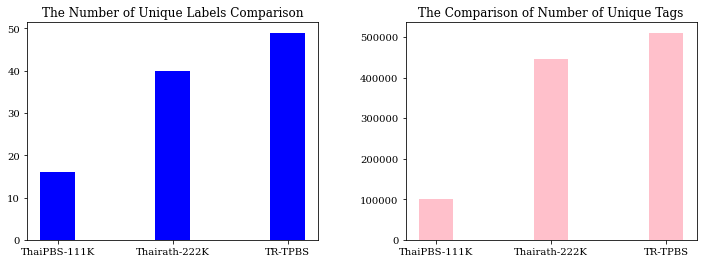


ThaiPBS-111K   contains 16 labels and  101456 tags
Thairath-222K  contains 40 labels and  445367 tags
TR-TPBS        contains 49 labels and  510689 tags


In [129]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
fig.subplots_adjust(wspace=0.3)
#tabels
objects = ('ThaiPBS-111K','Thairath-222K', 'TR-TPBS')
y_pos = np.arange(len(objects))
datasets_size = [len(unique_type_tpbs), len(unique_type_df_tr), len(unique_type_trtpbs)]
ax1.bar(objects, datasets_size, align='center', alpha=1, width=0.3, color="blue")
ax1.set_title('The Number of Unique Labels Comparison')
#tags
objects2 = ('ThaiPBS-111K','Thairath-222K', 'TR-TPBS')
y_pos2 = np.arange(len(objects2))
datasets_size2 = [len(unique_tags_tpbs), len(unique_tags_df_tr), len(unique_tags_trtpbs)]
ax2.bar(objects2, datasets_size2, align='center', alpha=1, width=0.3, color='pink')
ax2.set_title('The Comparison of Number of Unique Tags')
plt.show()
print()
print("ThaiPBS-111K   contains", len(unique_type_tpbs), "labels and ", len(unique_tags_tpbs), "tags")
print("Thairath-222K  contains", len(unique_type_df_tr), "labels and ", len(unique_tags_df_tr), "tags")
print("TR-TPBS        contains", len(unique_type_trtpbs), "labels and ", len(unique_tags_trtpbs), "tags")

In [131]:
## Examples of news-labels in TR-TPBS
for x in list(unique_type_trtpbs)[:10]:
  print(x)

ฟุตซอล
ข่าวบันเทิง
ไลฟ์
ไทยพีบีเอส อินไซส์
ฟุตบอลโลก
เลือกตั้ง
ผู้หญิง
หวย
ต่างประเทศ
ทั่วไทย


# Average Number of Tokens (words)

In [ ]:
trtpbs_title_length = 0
trtpbs_article_length = 0
trtpbs_summary_length = 0

for index, row in tqdm(df_trtpbs.iterrows(), total=df_trtpbs.shape[0]):
  trtpbs_title_length += len(word_tokenize(row['title'], keep_whitespace=False))
  trtpbs_article_length += len(word_tokenize(row['body'], keep_whitespace=False))
  trtpbs_summary_length += len(word_tokenize(row['summary'], keep_whitespace=False))

In [ ]:
# TR-TPBS
avg_trtpbs_title_length = trtpbs_title_length/len(df_trtpbs)
avg_trtpbs_article_length = trtpbs_article_length/len(df_trtpbs)
avg_trtpbs_summary_length = trtpbs_summary_length/len(df_trtpbs)

# Thairath-222k
avg_tr_tile_length = df_tr['title_length'].mean()
avg_tr_article_length = df_tr['article_length'].mean()
avg_tr_summary_length = df_tr['summary_length'].mean()

# ThaiPBS-111k
avg_tpbs_tile_length = df_tpbs['title_length'].mean()
avg_tpbs_article_length = df_tpbs['article_length'].mean()
avg_tpbs_summary_length = df_tpbs['summary_length'].mean()

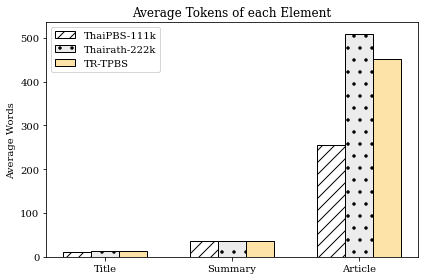


TR-TPBS: avg_title  13.432791082122435  avg_body  452.48069315528454  avg_sum  36.43308375626355
Thairath: avg_title 13.870848741648057  avg_body  509.9518856182572   avg_sum  35.91944390774332
ThaiPBS: avg_title  11.740516422670991  avg_body  254.28273334886305  avg_sum  36.52586593079721


In [134]:
# data
labels = ['Title',  'Summary', 'Article']
tpbs = [ avg_tpbs_tile_length, avg_tpbs_summary_length, avg_tpbs_article_length]
tr = [avg_tr_tile_length, avg_tr_summary_length, avg_tr_article_length]
tr_tpbs = [avg_trtpbs_title_length, avg_trtpbs_summary_length, avg_trtpbs_article_length]
x = np.arange(len(labels))
width = 0.22 
fig, ax = plt.subplots()
rects1 = ax.bar(x-width, tpbs, width, label='ThaiPBS-111k', color='#FFFFFF', hatch="//", edgecolor='black')
rects2 = ax.bar(x, tr, width, label='Thairath-222k',color='#ececec', hatch=".", edgecolor='black' )
rects3 = ax.bar(x+width, tr_tpbs, width, label='TR-TPBS', color='#fde3a7', hatch="", edgecolor='black' )
ax.set_ylabel('Average Words')
ax.set_title('Average Tokens of each Element')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
fig1 = plt.gcf()
plt.show()

print()
print("TR-TPBS: avg_title ", avg_trtpbs_title_length," avg_body " ,avg_trtpbs_article_length, " avg_sum ",avg_trtpbs_summary_length)
print("Thairath: avg_title", avg_tr_tile_length, " avg_body " ,avg_tr_article_length,  "  avg_sum ",avg_tr_summary_length )
print("ThaiPBS: avg_title ", avg_tpbs_tile_length," avg_body " , avg_tpbs_article_length,  " avg_sum ",avg_tpbs_summary_length )

# Average Number of Sentences & Compression Ratio

In [ ]:
# tr-tpbs
trtpbs_article_sent_length = 0
trtpbs_summary_sent_length = 0
for index, row in tqdm(df_trtpbs.iterrows(), total=df_trtpbs.shape[0]):
  trtpbs_article_sent_length += len(sent_tokenize(row['body']))
  trtpbs_summary_sent_length += len(sent_tokenize(row['summary']))
# tpbs
tr_article_sent_length = 0
tr_summary_sent_length = 0
for index, row in tqdm(df_tr.iterrows(), total=df_tr.shape[0]):
  tr_article_sent_length += len(sent_tokenize(row['body']))
  tr_summary_sent_length += len(sent_tokenize(row['summary']))
# tr
tpbs_article_sent_length = 0
tpbs_summary_sent_length = 0
for index, row in tqdm(df_tpbs.iterrows(), total=df_tpbs.shape[0]):
  tpbs_article_sent_length += len(sent_tokenize(row['body']))
  tpbs_summary_sent_length += len(sent_tokenize(row['summary']))

avg_trtpbs_article_sent_length = round(trtpbs_article_sent_length/len(df_tpbs), 2)
avg_trtpbs_summary_sent_length = round(trtpbs_summary_sent_length/len(df_tpbs), 2)
avg_tr_article_sent_length = round(tr_article_sent_length/len(df_tr), 2)
avg_tr_summary_sent_length = round(tr_summary_sent_length/len(df_tr), 2)
avg_tpbs_article_sent_length = round(tpbs_article_sent_length/len(df_trtpbs), 2)
avg_tpbs_summary_sent_length = round(tpbs_summary_sent_length/len(df_trtpbs), 2)

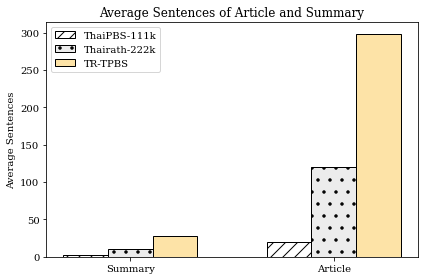


TR-TPBS:  avg_sent_body 298.74  avg_sent_sum 27.18  compression ratio 10.99
Thairath: avg_sent_body 120.53  avg_sent_sum 10.13  compression ratio 11.9
Tpbs:     avg_sent_body 20.47   avg_sent_sum 2.96   compression ratio 6.92


In [141]:
# data
labels = ['Summary', 'Article']
tpbs = [avg_tpbs_summary_sent_length, avg_tpbs_article_sent_length]
tr = [avg_tr_summary_sent_length, avg_tr_article_sent_length]
tr_tpbs = [avg_trtpbs_summary_sent_length, avg_trtpbs_article_sent_length]
x = np.arange(len(labels))
width = 0.22 
fig, ax = plt.subplots()
rects1 = ax.bar(x-width, tpbs, width, label='ThaiPBS-111k', color='#FFFFFF', hatch="//", edgecolor='black')
rects2 = ax.bar(x, tr, width, label='Thairath-222k',color='#ececec', hatch=".", edgecolor='black' )
rects3 = ax.bar(x+width, tr_tpbs, width, label='TR-TPBS', color='#fde3a7', hatch="", edgecolor='black' )
ax.set_ylabel('Average Sentences')
ax.set_title('Average Sentences of Article and Summary')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
fig1 = plt.gcf()
plt.show()

print()
print("TR-TPBS:  avg_sent_body", avg_trtpbs_article_sent_length, " avg_sent_sum", avg_trtpbs_summary_sent_length, " compression ratio", round(avg_trtpbs_article_sent_length/ avg_trtpbs_summary_sent_length, 2))
print("Thairath: avg_sent_body", avg_tr_article_sent_length, " avg_sent_sum", avg_tr_summary_sent_length, " compression ratio",  round(avg_tr_article_sent_length/avg_tr_summary_sent_length, 2))
print("Tpbs:     avg_sent_body", avg_tpbs_article_sent_length, "  avg_sent_sum", avg_tpbs_summary_sent_length, "  compression ratio",  round(avg_tpbs_article_sent_length/avg_tpbs_summary_sent_length, 2))

# Level of Abstractedness

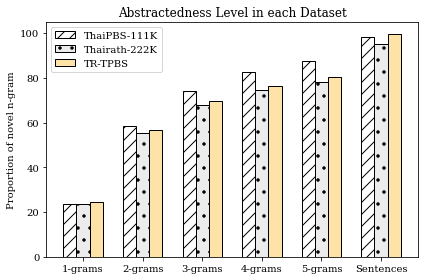


"The higher level of abstractedness creates new challenges for the summarization systems 
 as they have to be more creative in generating more novel summaries", according to Koupaee, M., & Wang, W. Y. (2018).


In [150]:
# data
labels = ['1-grams', '2-grams', '3-grams', '4-grams', '5-grams', 'Sentences']
trtpbs = [24.53102012,56.69915252,69.68104127,76.32939739,80.20300963,99.82606719]
tr = [23.66051313,55.44594339,68.05996836,74.38170649,78.0331832,95.09129881] 
tpbs = [23.79801516,58.54822143,73.93684608,82.50715153,87.75524999,98.46708886]
x = np.arange(len(labels)) 
width = 0.22  
fig, ax = plt.subplots()
rects1 = ax.bar(x-width, tpbs, width, label='ThaiPBS-111K', color='#FFFFFF', hatch="//", edgecolor='black')
rects2 = ax.bar(x, tr, width, label='Thairath-222K',color='#ececec', hatch=".", edgecolor='black' )
rects3 = ax.bar(x+width, trtpbs , width, label='TR-TPBS', color='#fde3a7', hatch="", edgecolor='black' )
ax.set_ylabel('Proportion of novel n-gram')
ax.set_title('Abstractedness Level in each Dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
fig1 = plt.gcf()
plt.show()

print()
print("\"The higher level of abstractedness creates new challenges for the summarization systems \n as they have to be more creative in generating more novel summaries\", according to Koupaee, M., & Wang, W. Y. (2018).")